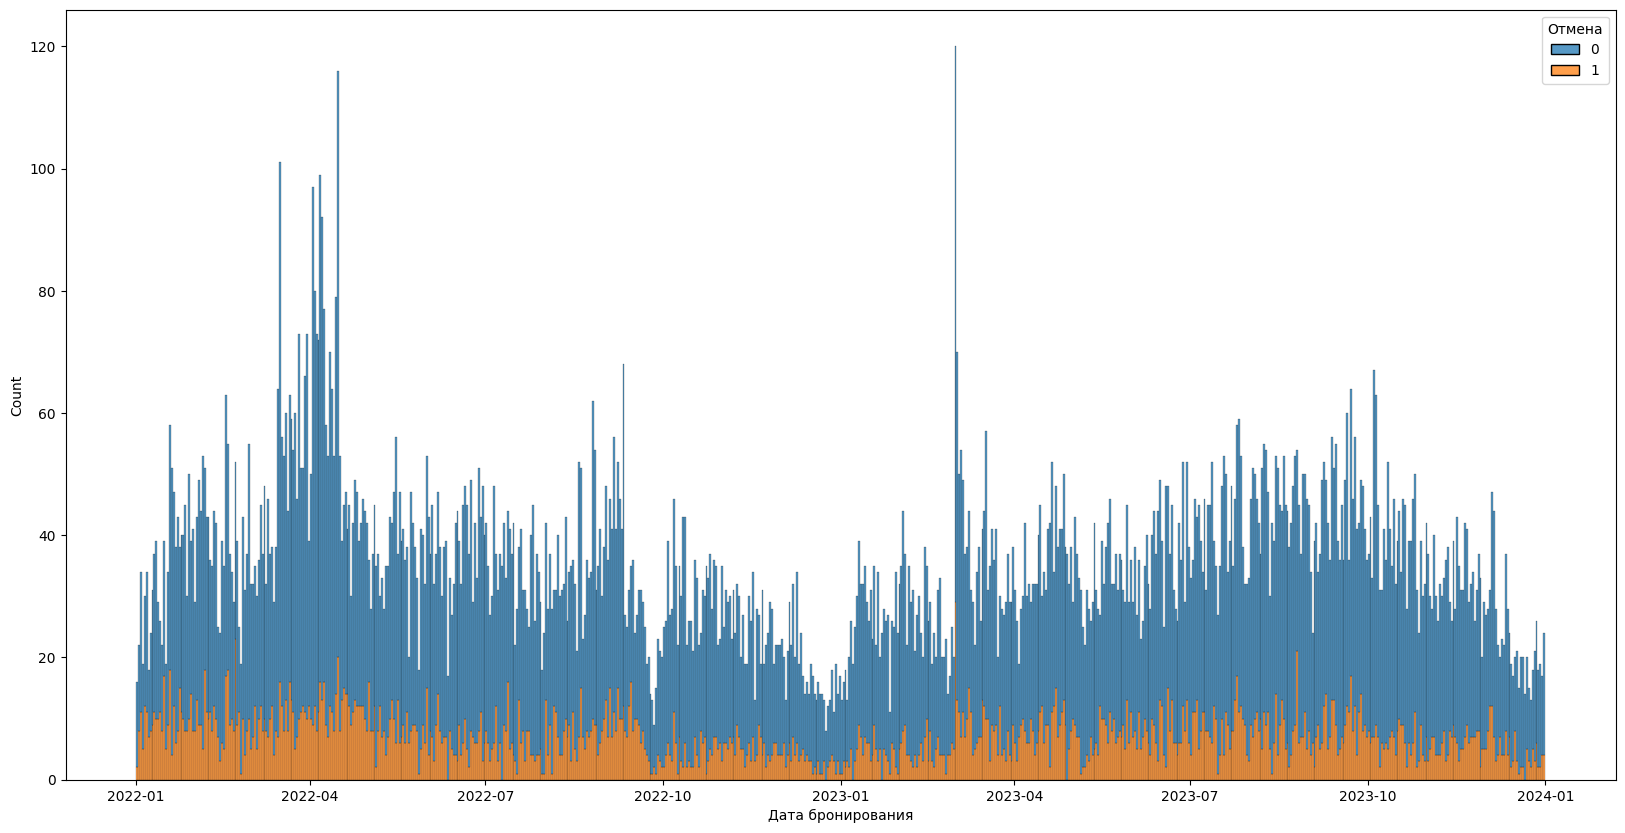

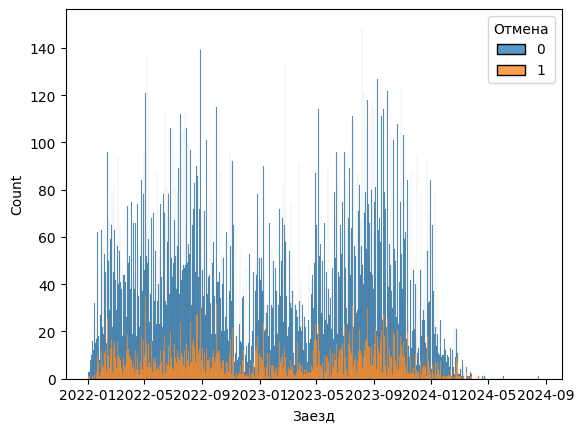

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Внешняя система оплаты'),
  Text(1, 0, 'Отложенная электронная оплата: Банк Россия (банк. карта)'),
  Text(2, 0, 'Банк. карта: Банк Россия (банк. карта)'),
  Text(3, 0, 'Внешняя система оплаты (С предоплатой)'),
  Text(4, 0, 'Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)'),
  Text(5, 0, 'Гарантия банковской картой'),
  Text(6, 0, 'Внешняя система оплаты (Оплата наличными)'),
  Text(7, 0, 'Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)'),
  Text(8, 0, 'При заселении'),
  Text(9, 0, 'Банк. карта: Эквайринг ComfortBooking (Банк. карта)'),
  Text(10, 0, 'Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта)'),
  Text(11, 0, 'Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay)'),
  Text(12, 0, 'Внешняя система оплаты (Банковская карта)'),
  Text(13, 0, 'Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay)')])

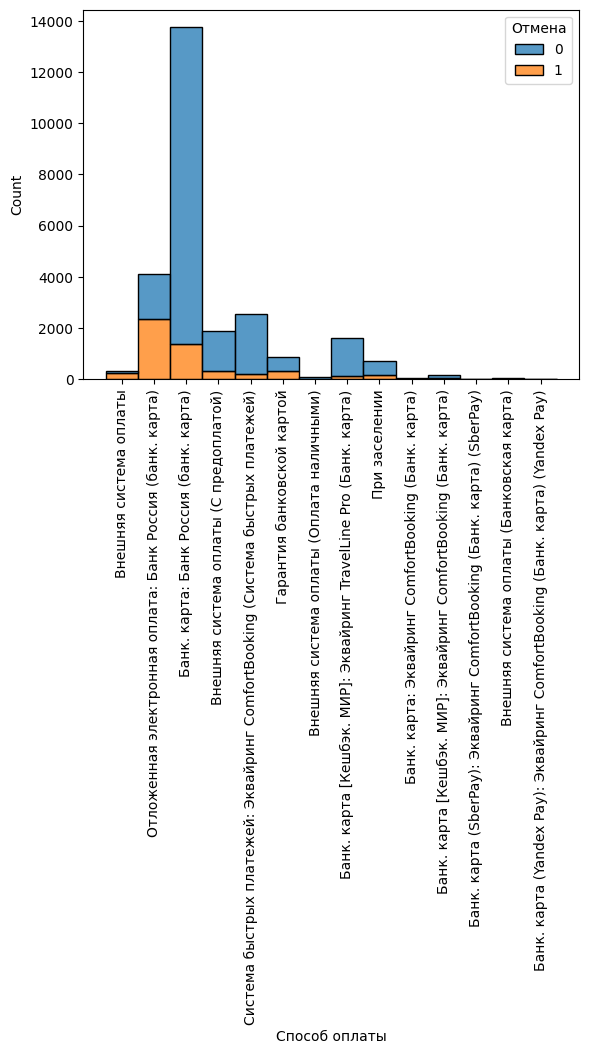

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data = df, x = 'Дата бронирования',  hue="Отмена", multiple="stack", log_scale=True, bins=365*2)
plt.show()
sns.histplot(data = df, x = 'Заезд',  hue="Отмена", multiple="stack", log_scale=True, bins=365*2)
plt.show()
plt.xticks(rotation=90)
sns.histplot(data = df, x = 'Способ оплаты',  hue="Отмена", multiple="stack")
plt.xticks(rotation=90)

In [ ]:
# обучение SVC
clf = make_pipeline(StandardScaler(), SVC(probability=True, gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install pandas

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# from sklearn.model_selection import train_test_split
# from sklearn.compose import ColumnTransformer
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [ ]:
df = pd.read_excel("train.xlsx", index_col="Unnamed: 0")

In [ ]:
df['Дата отмены'] = df['Дата отмены'].apply(lambda x: 1 if pd.notna(x) else 0)
df = df.rename(columns={'Дата отмены': 'Отмена'})

In [ ]:
df = df.drop(index=0, columns=["№ брони", 'Статус брони'])
y = df['Отмена']
df.head()
df1 = df

In [ ]:
# @title Ночей vs Гостей

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Ночей', y='Гостей', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.head()
# df.info()

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Отмена,Заезд,Ночей,Выезд,Источник,Категория номера,Гостей,Гостиница
1,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Номер «Стандарт»,2,1
2,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Номер «Студия»,2,4
3,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,0,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Номер «Стандарт»,1,3
4,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,0,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Номер «Люкс»,4,1
5,1,39100.0,8755,Банк. карта: Банк Россия (банк. карта),2023-08-15 07:48:35,1,2023-09-04 15:00:00,4,2023-09-08 12:00:00,Официальный сайт,Номер «Стандарт»,3,3


In [ ]:
X = df1.drop(columns=['Отмена'])
X = pd.DataFrame(X, index=X.index, dtype=str)

cat_columns = ['Способ оплаты', 'Источник', "Дата бронирования", "Заезд", "Выезд", 'Категория номера']
dates = ["Дата бронирования", "Заезд", "Выезд"]
split_list = []
for e in dates:
    df_split = X[e].str.split(' ').str[0]
    df_split = df_split.str.split('-', expand=True)
    df_split.columns = [f'{e}_год', f'{e}_месяц', f'{e}_день']
    for ee in [f'{e}_год', f'{e}_месяц', f'{e}_день']:
        cat_columns.append(ee)
    cat_columns.remove(e)
    split_list.append(df_split)


X = pd.concat([X.drop(columns=dates), *split_list], axis=1)
X = pd.DataFrame(X, index=X.index, dtype=str)

X
# for column in dates:
#     enc = LabelEncoder()
#     X[column] = enc.fit_transform(X[column])
# label_data = pd.DataFrame(cat_df)

# cat_df = df1[cat_columns]
# real_df = df1.loc[:, ~df1.columns.isin(cat_columns)]
# real_df = pd.DataFrame(real_df, index=real_df.index, dtype=float)


# data_norm = (real_df - real_df.min()) / (real_df.max() - real_df.min())
# data_norm.columns = data_norm.columns.astype(str)
# label_data.columns = label_data.columns.astype(str)

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Ночей,Источник,Категория номера,Гостей,Гостиница,Дата бронирования_год,Дата бронирования_месяц,Дата бронирования_день,Заезд_год,Заезд_месяц,Заезд_день,Выезд_год,Выезд_месяц,Выезд_день
1,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2,Официальный сайт,Номер «Стандарт»,2,1,2022,06,18,2022,07,11,2022,07,13
2,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2,Официальный сайт,Номер «Студия»,2,4,2022,11,14,2022,12,04,2022,12,06
3,1,10500.0,0,Внешняя система оплаты (С предоплатой),1,Bronevik.com(new),Номер «Стандарт»,1,3,2023,09,08,2023,09,18,2023,09,19
4,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2,Официальный сайт,Номер «Люкс»,4,1,2023,05,20,2023,05,29,2023,05,31
5,1,39100.0,8755,Банк. карта: Банк Россия (банк. карта),4,Официальный сайт,Номер «Стандарт»,3,3,2023,08,15,2023,09,04,2023,09,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2,Официальный сайт,Номер «Стандарт»,2,2,2023,01,07,2023,03,10,2023,03,12
26170,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),3,Официальный сайт,Номер «Студия»,3,4,2023,06,20,2023,06,25,2023,06,28
26171,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),4,Официальный сайт,Номер «Стандарт»,2,2,2022,05,08,2022,06,24,2022,06,28
26172,1,6300.0,0,Гарантия банковской картой,1,booking.com,Номер «Стандарт»,2,3,2022,02,19,2022,04,27,2022,04,28


In [ ]:
X = pd.concat([data_norm, label_data], axis='columns')

X.head()

<class 'pandas.core.frame.DataFrame'>
Index: 26173 entries, 1 to 26173
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Номеров             26173 non-null  float64
 1   Стоимость           26173 non-null  float64
 2   Внесена предоплата  26173 non-null  float64
 3   Ночей               26173 non-null  float64
 4   Гостей              26173 non-null  float64
 5   Гостиница           26173 non-null  float64
 6   Способ оплаты       26173 non-null  int64  
 7   Источник            26173 non-null  int64  
 8   Дата бронирования   26173 non-null  int64  
 9   Заезд               26173 non-null  int64  
 10  Выезд               26173 non-null  int64  
 11  Категория номера    26173 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 2.6 MB


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [ ]:
X_train

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Ночей,Источник,Категория номера,Гостей,Гостиница,Дата бронирования_год,Дата бронирования_месяц,Дата бронирования_день,Заезд_год,Заезд_месяц,Заезд_день,Выезд_год,Выезд_месяц,Выезд_день
21774,1,34000.0,12700,Банк. карта: Банк Россия (банк. карта),3,Официальный сайт,Номер «Стандарт»,1,2,2022,05,10,2022,06,24,2022,06,27
7489,1,27900.0,27900,Банк. карта: Банк Россия (банк. карта),1,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1,2023,11,01,2023,11,05,2023,11,06
875,1,20520.0,20520,Внешняя система оплаты (С предоплатой),3,Яндекс.Путешествия,Номер «Стандарт»,2,3,2023,10,04,2023,11,23,2023,11,26
14219,2,20000.0,20000,Банк. карта: Банк Россия (банк. карта),1,Официальный сайт,Номер «Стандарт»,4,2,2023,09,11,2023,10,21,2023,10,22
10103,1,12100.0,12100,Банк. карта: Банк Россия (банк. карта),1,Официальный сайт,Номер «Стандарт» для маломобильных групп насел...,2,1,2023,07,08,2023,07,12,2023,07,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15832,1,20800.0,10400,Банк. карта: Банк Россия (банк. карта),2,Официальный сайт,Номер «Стандарт»,1,1,2023,08,12,2023,08,17,2023,08,19
13862,1,30600.0,10200,Банк. карта: Банк Россия (банк. карта),3,Официальный сайт,Номер «Стандарт»,2,3,2022,08,23,2022,09,04,2022,09,07
1968,1,134100.0,19100,Банк. карта: Банк Россия (банк. карта),6,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,5,1,2022,06,26,2022,07,03,2022,07,09
18062,1,175780.0,0,Отложенная электронная оплата: Банк Россия (ба...,8,Официальный сайт,Коттедж с 2 спальнями,3,1,2023,08,10,2023,10,27,2023,11,04


In [ ]:
# Определение индексов категориальных признаков
cat_feature_indices = [X.columns.get_loc(col) for col in cat_columns]

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 200, 600),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
        # 'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 10.0),
        'random_strength': trial.suggest_int('random_strength', 1, 10),
        'loss_function': 'Logloss'
    }

    clf = CatBoostClassifier(**params)
    clf.fit(X_train, y_train, cat_features=cat_feature_indices, eval_set=(X_test, y_test), verbose=0)

    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return roc_auc

# Запуск оптимизации
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Вывод лучших гиперпараметров
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-09-21 15:53:51,874] A new study created in memory with name: no-name-f5f0da7c-71bb-47a8-9cfd-db8777fcedb3
[I 2024-09-21 15:54:32,186] Trial 0 finished with value: 0.8318115984010196 and parameters: {'iterations': 574, 'learning_rate': 0.16325221682318297, 'depth': 6, 'l2_leaf_reg': 6, 'random_strength': 1}. Best is trial 0 with value: 0.8318115984010196.
[I 2024-09-21 15:56:13,534] Trial 1 finished with value: 0.8354176467180349 and parameters: {'iterations': 460, 'learning_rate': 0.10123937165862634, 'depth': 10, 'l2_leaf_reg': 9, 'random_strength': 1}. Best is trial 1 with value: 0.8354176467180349.
[I 2024-09-21 15:56:47,719] Trial 2 finished with value: 0.8339324488731823 and parameters: {'iterations': 288, 'learning_rate': 0.2283585188830824, 'depth': 8, 'l2_leaf_reg': 8, 'random_strength': 1}. Best is trial 1 with value: 0.8354176467180349.
[I 2024-09-21 15:57:06,004] Trial 3 finished with value: 0.8323601181855049 and parameters: {'iterations': 215, 'learning_rate': 0.16

Best trial:
  Value: 0.8407387752737385
  Params: 
    iterations: 573
    learning_rate: 0.23877500875063792
    depth: 7
    l2_leaf_reg: 7
    random_strength: 2


In [ ]:
# Создание и обучение модели CatBoost
clf = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=50)
clf.fit(X_train, y_train, cat_features=cat_columns)

# Предсказание и оценка модели
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)

#[I 2024-09-21 16:16:14,230] Trial 36 finished with value: 0.8407387752737385 and parameters: {'iterations': 573, 'learning_rate': 0.23877500875063792, 'depth': 7, 'l2_leaf_reg': 7, 'random_strength': 2

0:	learn: 0.5995385	total: 81.1ms	remaining: 1m 20s
50:	learn: 0.2927950	total: 2.85s	remaining: 53s
100:	learn: 0.2820242	total: 5.63s	remaining: 50.2s
150:	learn: 0.2750072	total: 8.52s	remaining: 47.9s
200:	learn: 0.2683443	total: 12.8s	remaining: 50.7s
250:	learn: 0.2634509	total: 15.9s	remaining: 47.5s
300:	learn: 0.2580965	total: 18.8s	remaining: 43.7s
350:	learn: 0.2522493	total: 21.7s	remaining: 40.2s
400:	learn: 0.2466491	total: 25.8s	remaining: 38.5s
450:	learn: 0.2408938	total: 29.2s	remaining: 35.5s
500:	learn: 0.2359190	total: 32.2s	remaining: 32.1s
550:	learn: 0.2309578	total: 35.2s	remaining: 28.7s
600:	learn: 0.2268914	total: 39.2s	remaining: 26s
650:	learn: 0.2223111	total: 42.7s	remaining: 22.9s
700:	learn: 0.2179133	total: 45.7s	remaining: 19.5s
750:	learn: 0.2131012	total: 48.7s	remaining: 16.2s
800:	learn: 0.2092904	total: 53s	remaining: 13.2s
850:	learn: 0.2051675	total: 56.4s	remaining: 9.88s
900:	learn: 0.2006115	total: 59.5s	remaining: 6.53s
950:	learn: 0.19688

In [ ]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
accuracy_score(y_test, y_pred)

0.8953199617956065

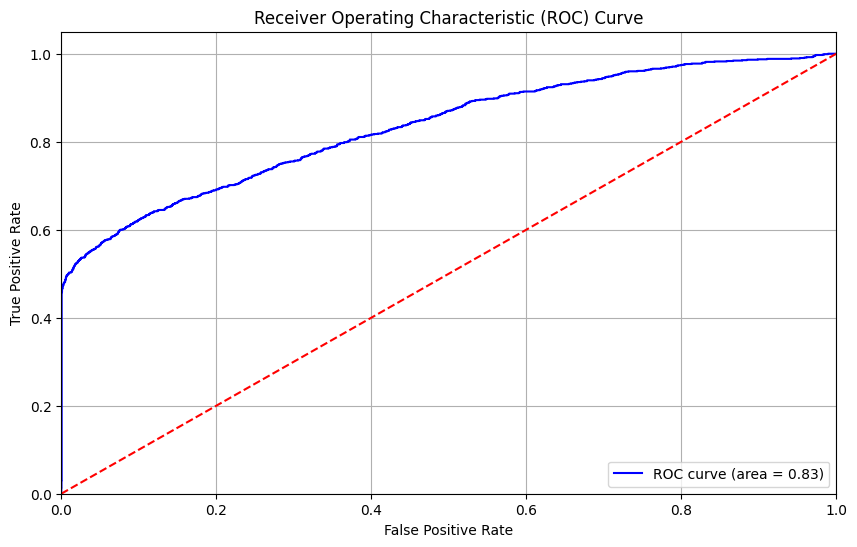

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4210
           1       0.94      0.50      0.65      1025

    accuracy                           0.90      5235
   macro avg       0.91      0.74      0.79      5235
weighted avg       0.90      0.90      0.88      5235

ROC-AUC: 0.8331067724929031


In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(classification_report(y_test, y_pred))
print(f'ROC-AUC: {roc_auc}')